  # 1.problem statement

In [ ]:
to detect whether a person is diabetic or not

# 2.DATA  GATHERING

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings

In [17]:
df=pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [ ]:
#3.EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [19]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [21]:
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Axes: >

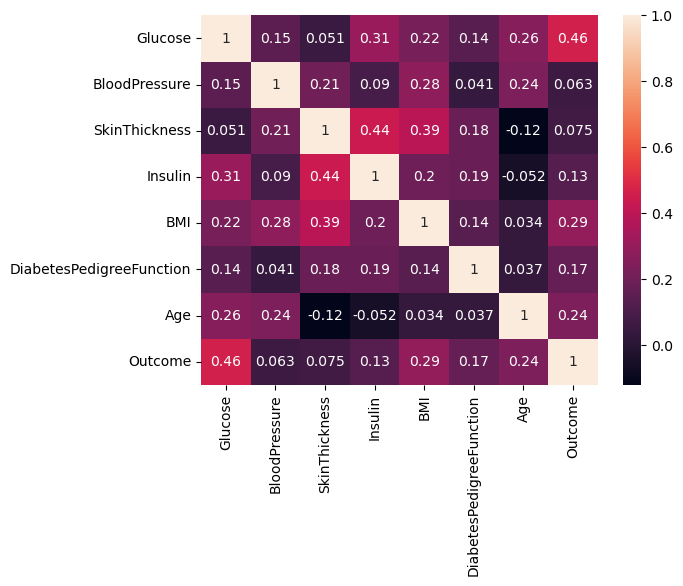

In [22]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.isna()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False


In [23]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1


In [28]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45,stratify=y)

In [31]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
608,152,82,39,272,41.5,0.270,27
611,174,58,22,194,32.9,0.593,36
77,95,72,33,0,37.7,0.370,27
570,78,70,0,0,32.5,0.270,39
1,85,66,29,0,26.6,0.351,31
...,...,...,...,...,...,...,...
643,90,0,0,0,28.0,0.610,31
409,172,68,49,579,42.4,0.702,28
167,120,68,0,0,29.6,0.709,34
741,102,44,20,94,30.8,0.400,26


In [32]:
#model training
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

LogisticRegression()

In [33]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
608,152,82,39,272,41.5,0.270,27
611,174,58,22,194,32.9,0.593,36
77,95,72,33,0,37.7,0.370,27
570,78,70,0,0,32.5,0.270,39
1,85,66,29,0,26.6,0.351,31
...,...,...,...,...,...,...,...
643,90,0,0,0,28.0,0.610,31
409,172,68,49,579,42.4,0.702,28
167,120,68,0,0,29.6,0.709,34
741,102,44,20,94,30.8,0.400,26


# model evaluation

In [36]:
#testing data evaluation

y_pred_test=logistic_reg.predict(x_test)

conf_matrix=confusion_matrix(y_test,y_pred_test)
print(conf_matrix)

[[92  8]
 [26 28]]


In [37]:
#Testing Data Evalation

y_pred = logistic_reg.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test,y_pred)
print("Accuarcy : ",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix: 
 [[92  8]
 [26 28]]
********************************************************************************
Accuarcy :  0.7792207792207793
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.92      0.84       100
           1       0.78      0.52      0.62        54

    accuracy                           0.78       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.78      0.77       154



In [53]:
#training Data Evaluation

y_pred_train = lr.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix: \n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuarcy : ",accuracy)
print("*"*80)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix: 
 [[351  49]
 [ 90 124]]
********************************************************************************
Accuarcy :  0.7736156351791531
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

         0.0       0.80      0.88      0.83       400
         1.0       0.72      0.58      0.64       214

    accuracy                           0.77       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.77      0.77       614



In [ ]:
api and testing

In [41]:
with open('model.pkl','wb')as file:
    pickle.dump(logistic_reg,file)

In [42]:
x.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [45]:
df={'columns':[x.columns],'results':{"Non Diabetic": 0, "Diabetic": 1}}

In [46]:
with open("asset.json",'w') as file:
    json.dump(df,file)

TypeError: Object of type Index is not JSON serializable